In [43]:
import tensorflow as tf
%load_ext autoreload
%autoreload
%reload_ext autoreload
from Scripts import get_data
from Scripts import NeuralNetwork
from Scripts import plot
from Scripts import metrics
from Scripts import ECG_processing

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
import random
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
train_data = pd.read_csv('./Data/train_data_ptb.csv')

In [45]:
test_data = pd.read_csv('./Data/test_data_ptb.csv')

In [46]:
# Preprocessing
print(np.where(test_data.iloc[:,:-1].isna()))
print(test_data.index[np.isinf(test_data.iloc[:,:-1]).any(1)])
#print(test_data.columns.to_series()[np.isinf(test_data.iloc[:,:-1]).any()])

count = 0
while len(np.where(test_data.iloc[:,:-1].isna())[1]) != 0:
    try:
        for i,j in enumerate(np.where(test_data.iloc[:,:-1].isna())[0]):
            print("-------")
            print(i)
            print(j)
            print(np.where(test_data.iloc[:,:-1].isna())[1][i])
            print(test_data.iloc[j,np.where(test_data.iloc[:,:-1].isna())[1][i]])
            test_data.iloc[j,np.where(test_data.iloc[:,:-1].isna())[1][i]] = test_data.iloc[:,np.where(test_data.iloc[:,:-1].isna())[1][i]].mean()
            count = count + 1
            print(count)
    except:
        continue
        
print(np.where(train_data.iloc[:,:-1].isna()))
print(train_data.index[np.isinf(train_data.iloc[:,:-1]).any(1)])
#print(data.columns.to_series()[np.isinf(data.iloc[:,:-1]).any()])

train_data = train_data.dropna()

print(np.where(train_data.iloc[:,1:-1].isna()))
print(train_data.index[np.isinf(train_data.iloc[:,1:-1]).any(1)])
#print(data.columns.to_series()[np.isinf(data.iloc[:,1:-1]).any()])

print(train_data.shape)

(array([1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021,
       1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1597,
       1597, 1597, 1597, 1597, 1597, 1597, 1597, 1597, 2030, 2030, 2030,
       2030, 2030, 2030, 2030, 2030, 2030], dtype=int64), array([ 86,  87,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 107, 108, 109, 112,  86,  87,  90, 103, 104,
       107, 108, 109, 112,  86,  87,  90, 103, 104, 107, 108, 109, 112],
      dtype=int64))
Int64Index([], dtype='int64')
-------
0
1021
86
nan
1
-------
1
1021
90
nan
2
-------
2
1021
92
nan
3
-------
3
1021
94
nan
4
-------
4
1021
96
nan
5
-------
5
1021
98
nan
6
-------
6
1021
100
nan
7
-------
7
1021
102
nan
8
-------
8
1021
104
nan
9
-------
9
1021
108
nan
10
-------
10
1021
112
nan
11
-------
11
1021
87
nan
12
-------
12
1021
103
nan
13
-------
13
1021
107
nan
14
-------
14
1021
109
nan
15
-------
15
1021
86
14.939227040749353
16
-------
16
1021
87
75.0174771053058

In [47]:
y_train = train_data['Labels'].str.lstrip("'[").str.rstrip("]'").str.replace("'", "").str.replace(" ", "")

In [48]:
y_test = test_data['Labels'].str.lstrip("'[").str.rstrip("]'").str.replace("'", "").str.replace(" ", "")

In [49]:
X_train = train_data.iloc[:,1:-1]

In [50]:
X_test = test_data.iloc[:,1:-1]

In [51]:
from sklearn.preprocessing import MultiLabelBinarizer
one_hot = MultiLabelBinarizer()
one_hot.fit(y_train.str.split(','))
y_train_ohe=one_hot.transform(y_train.str.split(','))

print(one_hot.classes_)
print("classes: {}".format(y_train_ohe.shape[1]))

['' 'CD' 'HYP' 'MI' 'NORM' 'STTC']
classes: 6


In [52]:
one_hot.classes_[1:]

array(['CD', 'HYP', 'MI', 'NORM', 'STTC'], dtype=object)

In [53]:
y_train_ohe=y_train_ohe[:,1:]

In [75]:
y_test_ohe=one_hot.transform(y_test.str.split(','))
y_test_ohe=y_test_ohe[:,1:]

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit([''.join(str(l)) for l in y_train_ohe])
y_train_ = encoder.transform([''.join(str(l)) for l in y_train_ohe])
print("Total number of unique combinations of diagnosis: {}".format(len(np.unique(y_train_))))

Total number of unique combinations of diagnosis: 22


# Using SKlearn:

In [56]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [69]:
clf = make_pipeline(LogisticRegression(random_state=42, verbose=1, n_jobs=-1, max_iter = 1000)).fit(X_train, y_train_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished


In [58]:
X_test_scaled = scaler.transform(X_test)

In [59]:
y_pred_test = clf.predict(X_test_scaled)

In [70]:
y_proba = clf.predict_proba(X_test_scaled)

In [80]:
new_inv_trans_y_pred_test = []
for i in range(len(inv_trans_y_pred_test)):
    temp_list = inv_trans_y_pred_test[i].replace("[","").replace("]","").split(' ')
    for j in range(len(temp_list)):
        temp_list[j] = int(temp_list[j])
    new_inv_trans_y_pred_test.append(temp_list)

In [81]:
new_inv_trans_y_pred_test = np.asarray(new_inv_trans_y_pred_test)

In [82]:
y_test_ohe

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [83]:
y_test_ = encoder.transform([''.join(str(l)) for l in y_test_ohe])

ValueError: y contains previously unseen labels: ['[1 1 0 1 0]']

In [84]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test_ohe, new_inv_trans_y_pred_test))
print("F1-score:", f1_score(y_test_ohe, new_inv_trans_y_pred_test, average='macro'))
print("F2-score:", fbeta_score(y_test_ohe, new_inv_trans_y_pred_test, average='macro', beta=2))
print("F0.5-score:", fbeta_score(y_test_ohe, new_inv_trans_y_pred_test, average='macro', beta=0.5))

Accuracy: 0.1289151157512483
F1-score: 0.26868158412426013
F2-score: 0.2996536282267471
F0.5-score: 0.2631770339728784


In [155]:
conf_matrix = plot.compute_modified_confusion_matrix_nonorm(y_test_ohe, new_inv_trans_y_pred_test)

In [156]:
conf_matrix=pd.DataFrame(conf_matrix)

In [157]:
conf_matrix.index = one_hot.classes_[1:]

In [158]:
conf_matrix.columns = one_hot.classes_[1:]

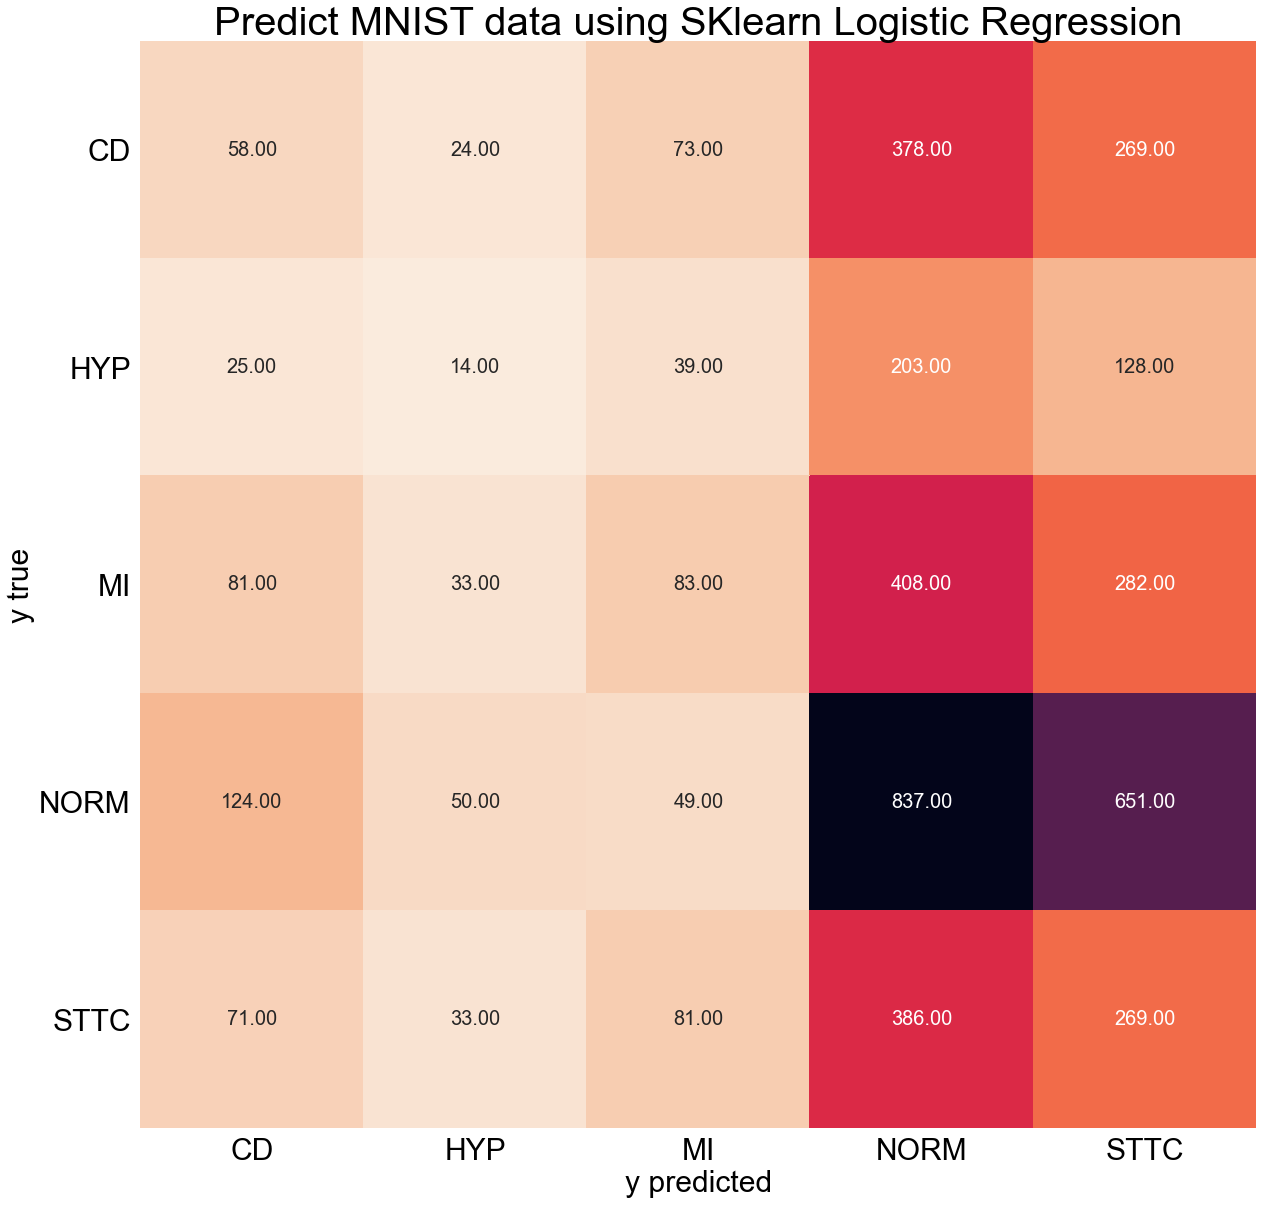

In [161]:
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix, cmap="rocket_r", annot=True,annot_kws={"size": 20}, fmt=".2f", cbar=False)
plt.title("Predict MNIST data using SKlearn Logistic Regression", fontsize = 40, color= "black")
plt.xlabel("y predicted",fontsize=30, color= "black")
plt.ylabel("y true",fontsize = 30, color= "black")
plt.yticks(fontsize=30, rotation=0, color= "black")
plt.xticks(fontsize=30, rotation=0, color= "black")
plt.savefig("Results/ECG_results/ECG_confMatrix_sklearn_logreg.png",dpi=100)
plt.show()

# Using own algorithm: